In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


## gender

In [ ]:
males1= pd.read_csv('../CSVs/general_0.csv')
males2= pd.read_csv('../CSVs/general_1.csv')
females1= pd.read_csv('../CSVs/females_0.csv')
females2= pd.read_csv('../CSVs/females_1.csv')

males= pd.concat([males1, males2], axis=0)
females=pd.concat([females1, females2], axis=0)
males['gender']=1
females['gender']=0
df=pd.concat([males,females], axis=0)


In [15]:
df=pd.read_csv('males_females.csv')

In [10]:
df.to_csv('males_females_mfcc.csv', index=False)

<Axes: xlabel='gender'>

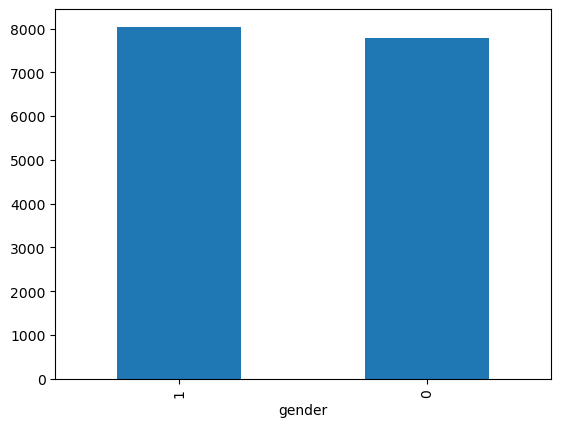

In [16]:
df['gender'].value_counts().plot(kind='bar')

In [18]:
## drop the columns that are not needed
selected_columns=['meanF0Hz','stdevF0Hz','localabsoluteJitter','f1_median']
general=df.loc[:, selected_columns]
general

,meanF0Hz,stdevF0Hz,localabsoluteJitter,f1_median
0,146.321267,17.821462,0.000122,375.828581
1,122.579712,36.926712,0.000320,410.832627
2,127.507176,30.732921,0.000159,409.350659
3,119.343185,22.787241,0.000323,329.179311
4,127.199478,22.051734,0.000184,510.845232
...,...,...,...,...
15813,227.263197,23.322958,0.000094,489.056205
15814,210.872602,27.579187,0.000059,519.227694
15815,155.687062,94.826780,0.000218,835.452729
15816,202.197520,53.548899,0.000095,453.681561


In [ ]:
X_train=general.drop(['gender'],axis=1)
y_train=general['gender']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
def evaluate_model(y,y_hat):
    precision = precision_score(y, y_hat)
    recall = recall_score(y, y_hat)
    f1 = f1_score(y, y_hat)
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    
    cm = confusion_matrix(y, y_hat)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()


In [ ]:
def scale_data(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

# ML models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled,y_train)
y_train_hat=clf.predict(X_train_scaled)
y_hat=clf.predict(X_test_scaled)
print("train evaluation")
evaluate_model(y_train,y_train_hat)
print("train evaluation")
evaluate_model(y_test,y_hat)

cross_val_score(clf, X_train_scaled, y_train, cv=5).mean()

In [ ]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled,y_train)
y_train_hat=rf.predict(X_train_scaled)
y_hat=rf.predict(X_test_scaled)
print("train evaluation")
evaluate_model(y_train,y_train_hat)
print("train evaluation")
evaluate_model(y_test,y_hat)

cross_val_score(rf, X_train_scaled, y_train, cv=5).mean()

In [ ]:
svm=SVC(random_state=42)
svm.fit(X_train,y_train)
y_train_hat=svm.predict(X_train_scaled)
y_hat=svm.predict(X_test_scaled)
print("train evaluation")
evaluate_model(y_train,y_train_hat)
print("train evaluation")
evaluate_model(y_test,y_hat)

cross_val_score(svm, X_train_scaled, y_train, cv=5).mean()

In [ ]:
xgb=XGBClassifier(random_state=42)
xgb.fit(X_train,y_train)
y_train_hat=xgb.predict(X_train_scaled)
y_hat=xgb.predict(X_test_scaled)
print("train evaluation")
evaluate_model(y_train,y_train_hat)
print("train evaluation")
evaluate_model(y_test,y_hat)

cross_val_score(xgb, X_train_scaled, y_train, cv=5).mean()

In [ ]:
adaboost=AdaBoostClassifier(random_state=42)
adaboost.fit(X_train,y_train)
y_train_hat=adaboost.predict(X_train_scaled)
y_hat=adaboost.predict(X_test_scaled)
print("train evaluation")
evaluate_model(y_train,y_train_hat)
print("train evaluation")
evaluate_model(y_test,y_hat)

cross_val_score(adaboost, X_train_scaled, y_train, cv=5).mean()

# NN

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [ ]:
# Replace with your actual input feature size
input_dim = 100  # example input size

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),  # Hidden layer 1
    Dense(32, activation='relu'),                             # Hidden layer 2
    Dense(1, activation='sigmoid')                            # Output layer
])

# Compile it
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Log loss
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
y_hat = model.predict(X_test)

evaluate_model(y_test, y_hat)
cross_val_score(model, X_train, y_train, cv=5).mean()